<a href="https://colab.research.google.com/github/Jaya-Kurade/Traffic-Signs-Signals-Detection-using-YOLOv8/blob/main/traffic_sign_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install ultralytics opencv-python matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 32.6 MB/s eta 0:00:00


In [ ]:
import os
import xml.etree.ElementTree as ET
from PIL import Image

In [ ]:
# SET THESE PATHS for Google Drive
img_folder = '/content/drive/MyDrive/traffic-sign-dataset/images'
xml_folder = '/content/drive/MyDrive/traffic-sign-dataset/annotations'
label_folder = '/content/drive/MyDrive/traffic-sign-dataset/labels'
os.makedirs(label_folder, exist_ok=True)

In [ ]:
# ----------------------------------------------------------

# Define class_map with your class names and their corresponding integer IDs
class_map = {
    'stop': 0,
    'yield': 1,
    'speedlimit': 2,
    'crosswalk': 3
}

for xml_file in os.listdir(xml_folder):
    if not xml_file.endswith('.xml'):
        continue
    xml_path = os.path.join(xml_folder, xml_file)
    tree = ET.parse(xml_path)
    root = tree.getroot()
    img_filename = root.find('filename').text if root.find('filename') is not None else xml_file.replace('.xml', '.jpg')
    img_path = os.path.join(img_folder, img_filename)
    if not os.path.exists(img_path):
        img_path = os.path.join(img_folder, img_filename.replace('.jpg', '.png'))
    if not os.path.exists(img_path):
        print(f"Image not found for {xml_file}. Skipping.")
        continue
    img = Image.open(img_path)
    w, h = img.size
    yolo_lines = []
    for obj in root.findall('object'):
        cls = obj.find('name').text
        if cls not in class_map:
            print(f"Class '{cls}' not in class_map. Skipping.")
            continue
        cls_id = class_map[cls]
        bbox = obj.find('bndbox')
        xmin = int(float(bbox.find('xmin').text))
        ymin = int(float(bbox.find('ymin').text))
        xmax = int(float(bbox.find('xmax').text))
        ymax = int(float(bbox.find('ymax').text))
        x_center = ((xmin + xmax) / 2) / w
        y_center = ((ymin + ymax) / 2) / h
        width = (xmax - xmin) / w
        height = (ymax - ymin) / h
        yolo_lines.append(f"{cls_id} {x_center:.6f} {y_center:.6f} {width:.6f} {height:.6f}")
    txt_filename = os.path.splitext(img_filename)[0] + '.txt'
    txt_path = os.path.join(label_folder, txt_filename)
    with open(txt_path, 'w') as f:
        f.write('\n'.join(yolo_lines))
    print(f"Saved {txt_path}")

Saved /content/drive/MyDrive/traffic-sign-dataset/labels/road108.txt
Class 'trafficlight' not in class_map. Skipping.
Class 'trafficlight' not in class_map. Skipping.
Saved /content/drive/MyDrive/traffic-sign-dataset/labels/road11.txt
Saved /content/drive/MyDrive/traffic-sign-dataset/labels/road126.txt
Saved /content/drive/MyDrive/traffic-sign-dataset/labels/road117.txt
Saved /content/drive/MyDrive/traffic-sign-dataset/labels/road111.txt
Saved /content/drive/MyDrive/traffic-sign-dataset/labels/road143.txt
Saved /content/drive/MyDrive/traffic-sign-dataset/labels/road116.txt
Saved /content/drive/MyDrive/traffic-sign-dataset/labels/road146.txt
Class 'trafficlight' not in class_map. Skipping.
Saved /content/drive/MyDrive/traffic-sign-dataset/labels/road14.txt
Saved /content/drive/MyDrive/traffic-sign-dataset/labels/road101.txt
Saved /content/drive/MyDrive/traffic-sign-dataset/labels/road103.txt
Saved /content/drive/MyDrive/traffic-sign-dataset/labels/road157.txt
Saved /content/drive/MyDriv

In [ ]:
yaml_content = """
train: /content/drive/MyDrive/traffic-sign-dataset/images
val: /content/drive/MyDrive/traffic-sign-dataset/images
nc: 4
names: ['stop', 'yield', 'speedlimit', 'crosswalk']
"""

with open('/content/drive/MyDrive/traffic-sign-dataset/data.yaml', 'w') as f:
    f.write(yaml_content)

In [ ]:
from ultralytics import YOLO

model = YOLO('yolov8s.pt')
model.train(
    data='/content/drive/MyDrive/traffic-sign-dataset/data.yaml',
    epochs=1,
    imgsz=640,
    batch=16
)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.223 🚀 Python-3.12.12 torch-2.8.0+cu126 CPU (Intel Xeon CPU @ 2.20GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/traffic-sign-dataset/data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=1, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, in

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7a9eadc9ecc0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04

In [ ]:
!pip install ultralytics opencv-python pillow

In [ ]:
from ultralytics import YOLO
import cv2
from PIL import Image
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import io
import numpy as np

In [ ]:
def take_photo(filename='photo.jpg', quality=0.8):
    js = Javascript('''
      async function takePhoto(quality) {
        const div = document.createElement('div');
        const capture = document.createElement('button');
        capture.textContent = 'Capture';
        div.appendChild(capture);

        const video = document.createElement('video');
        video.style.display = 'block';
        const stream = await navigator.mediaDevices.getUserMedia({video: true});

        document.body.appendChild(div);
        div.appendChild(video);
        video.srcObject = stream;
        await video.play();

        // Resize for display
        google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

        // Wait for Capture button
        await new Promise((resolve) => capture.onclick = resolve);

        const canvas = document.createElement('canvas');
        canvas.width = video.videoWidth;
        canvas.height = video.videoHeight;
        canvas.getContext('2d').drawImage(video, 0, 0);
        stream.getVideoTracks()[0].stop();
        div.remove();

        const dataUrl = canvas.toDataURL('image/jpeg', quality);
        return dataUrl;
      }
    ''')
    display(js)
    data = eval_js('takePhoto({})'.format(quality))
    binary = b64decode(data.split(',')[1])
    with open(filename, 'wb') as f:
        f.write(binary)
    return filename

In [ ]:
try:
    filename = take_photo()
    print("✅ Saved photo:", filename)
except Exception as err:
    print("❌ Error capturing photo:", str(err))

<IPython.core.display.Javascript object>

✅ Saved photo: photo.jpg



image 1/1 /content/photo.jpg: 480x640 2 speedlimits, 1 crosswalk, 441.4ms
Speed: 2.8ms preprocess, 441.4ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
Results saved to /content/runs/detect/predict3


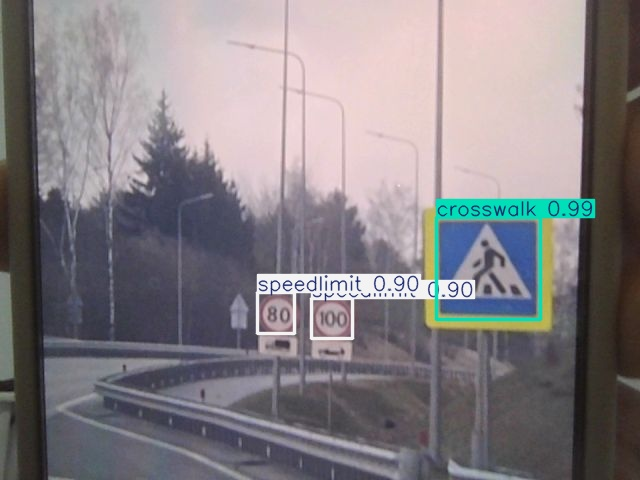

In [ ]:
# Load your trained model
model = YOLO('/content/runs/detect/train/weights/best.pt')

# Perform prediction
results = model.predict(source='photo.jpg', iou= 0.4, conf=0.8, save=True)

# Display result
from IPython.display import Image as IPyImage
display(IPyImage(filename=results[0].save_dir + '/photo.jpg'))